In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [58]:
import numpy as np
import pandas as pd
from PIL import Image

import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.naive_bayes import ComplementNB
import warnings
warnings.filterwarnings("ignore")

### Loading twitter Dataset

In [50]:
twitter = pd.read_csv("train.csv")
twitter.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


### Checking for the shape of the data set

In [51]:
twitter.shape

(27481, 4)

### Checking for missing values

In [52]:
twitter.isna().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

### Replacing the missing values with the median values

In [53]:
tweet = twitter.fillna(twitter.median)

In [54]:
tweet.isna().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [55]:
tweet["length"] = tweet['text'].apply(lambda X: len(str(X).split(' ')))

In [56]:
tweet

,textID,text,selected_text,sentiment,length
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,8
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,11
2,088c60f138,my boss is bullying me...,bullying me,negative,5
3,9642c003ef,what interview! leave me alone,leave me alone,negative,6
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,15
...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,18
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,26
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,24
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,8


<BarContainer object of 40 artists>

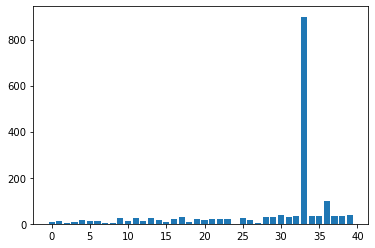

In [70]:
unique_lengths = tweet['length'].unique()
plt.bar(np.arange(len(unique_lengths)), unique_lengths)

### Droping off textID

In [67]:
columns = ['textID']
tweet.drop(columns, inplace=True, axis=1)

In [68]:
tweet

,text,selected_text,sentiment,length
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,8
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,11
2,my boss is bullying me...,bullying me,negative,5
3,what interview! leave me alone,leave me alone,negative,6
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,15
...,...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,negative,18
27477,I`ve wondered about rake to. The client has ...,", don`t force",negative,26
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,24
27479,But it was worth it ****.,But it was worth it ****.,positive,8


### checking the value of sentiments

In [71]:
print(tweet['sentiment'].value_counts())

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64


### Checking for unique sentence in each doucment

In [74]:
tweet['text'].unique()

array([' I`d have responded, if I were going',
       ' Sooo SAD I will miss you here in San Diego!!!',
       'my boss is bullying me...', ...,
       ' Yay good for both of you. Enjoy the break - you probably need it after such hectic weekend  Take care hun xxxx',
       ' But it was worth it  ****.',
       '   All this flirting going on - The ATG smiles. Yay.  ((hugs))'],
      dtype=object)

### Getting the arrays of the words

In [75]:
tweet['length'].unique()

array([  8,  11,   5,   6,  15,  12,  14,   2,   4,  24,  10,  27,  13,
        25,  18,   9,  23,  28,   7,  22,  16,  19,  20,  21,   1,  26,
        17,   3,  30,  29,  38,  31,  33, 899,  32,  35, 101,  34,  36,
        37])

### Plot of each sentiment to check if it is balance

neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64



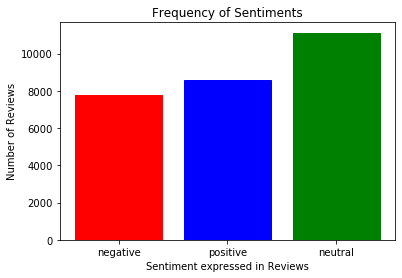

In [76]:
Index = [2, 1, 0]

print(tweet["sentiment"].value_counts())
print()

barlist = plt.bar(Index, tweet["sentiment"].value_counts())

plt.title("Frequency of Sentiments")
plt.xticks(Index, ['neutral','positive', 'negative'])
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

barlist[Index[2]].set_color('green')
barlist[Index[1]].set_color('blue')
barlist[Index[0]].set_color('red')
plt.show()

### Balancing of dataset

In [83]:
min_size = ((tweet['sentiment'] == 0).sum(), (tweet['sentiment'] == 1).sum())

tweet = pd.concat([
    tweet.loc[tweet[tweet['sentiment'] == 0].index[:min_size]]
    tweet.loc[tweet[tweet['sentiment'] == 1].index[:min_size]]
])

tweet.head()

In [84]:
axis.tweet['sentiment'].value_counts(sort = False).plot(kind = "barl")
axis.set_Xlabels("Description of labels")
axis.set_ylabels("sentiment")